In [334]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.model_selection import GridSearchCV,train_test_split
import warnings
warnings.filterwarnings("ignore")

# 1. Read data

In [335]:
train_df = pd.read_csv('train.csv', index_col=0)
predict_df = pd.read_csv('test.csv', index_col=0)

In [336]:
train_df.shape

(1460, 80)

# 2. Data exploration

## 2.1 Normalize the sale price

In [337]:
from scipy.stats import norm
import matplotlib.mlab as mlab

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5,1,'SalePrice distribution')

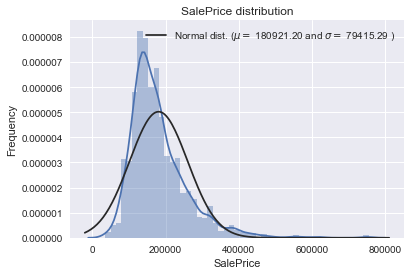

In [338]:
y_org = train_df['SalePrice']
sns.distplot(y_org, fit=norm)
print("Skewness: %f" % y_org.skew())
print("Kurtosis: %f" % y_org.kurt())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_org)

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Skewness: 0.121347
Kurtosis: 0.809519


Text(0.5,1,'SalePrice distribution')

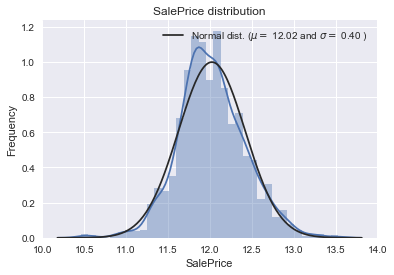

In [339]:
y = np.log1p(train_df.pop('SalePrice'))
sns.distplot(y,fit=norm)
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

## 2.2 check how many Nans in each column and sort them (only show columns that contains Nans)

In [340]:
Nan_train = train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0]*100
Nan_train[Nan_train>0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### 2.3.1 filling all Nans with null and treat null as a independent class

This feature contains 0.0 % Nans


Text(0.5,1,'MSSubClass')

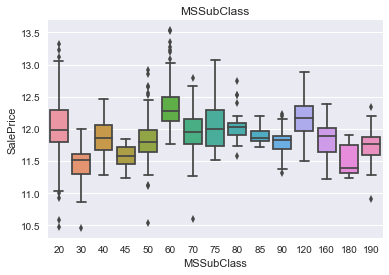

In [341]:
head = 'MSSubClass'
print('This feature contains %.1f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head]],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'MSZoning')

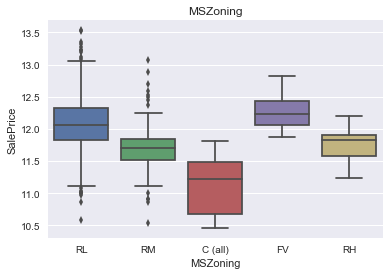

In [228]:
head = 'MSZoning'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head]],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 17.74 % Nans


Text(0,0.5,'SalePrice')

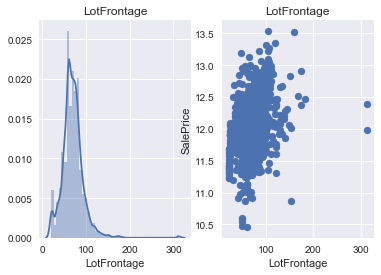

In [229]:
head = 'LotFrontage'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')


This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

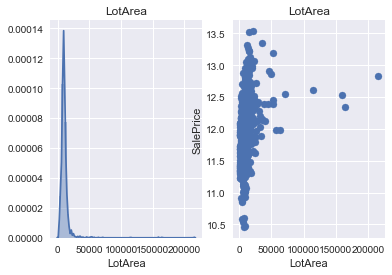

In [230]:
head = 'LotArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'Street')

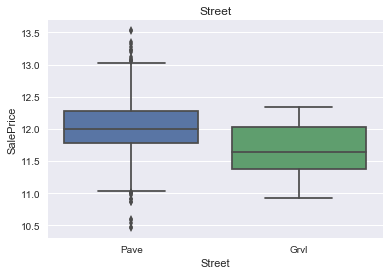

In [231]:
head = 'Street'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head]],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 93.77 % Nans


Text(0.5,1,'Alley')

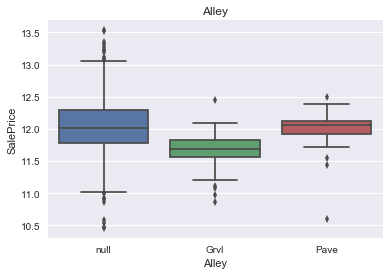

In [232]:
head = 'Alley'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LotShape')

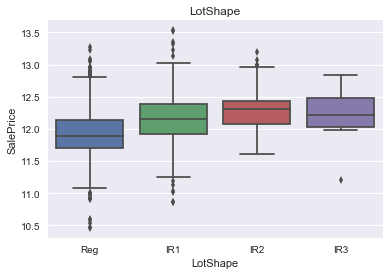

In [233]:
head = 'LotShape'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LandContour')

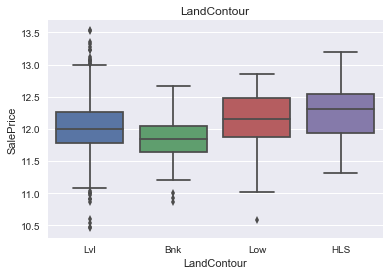

In [234]:
head = 'LandContour'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Utilities')

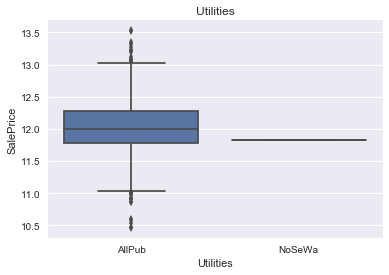

In [235]:
head = 'Utilities'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LotConfig')

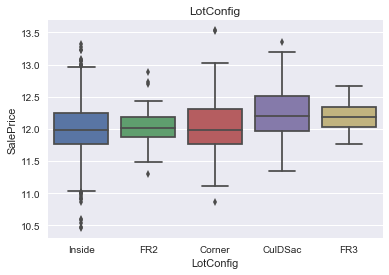

In [236]:
head = 'LotConfig'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LandSlope')

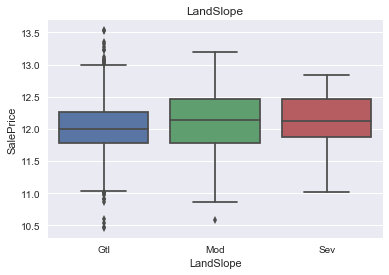

In [237]:
head = 'LandSlope'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Neighborhood')

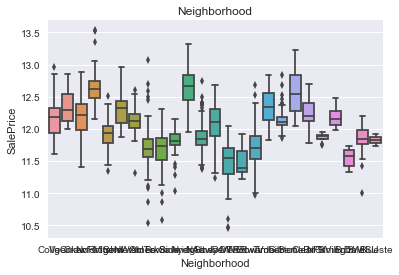

In [238]:
head = 'Neighborhood'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Condition1')

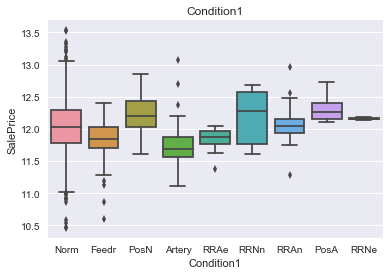

In [239]:
head = 'Condition1'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Condition2')

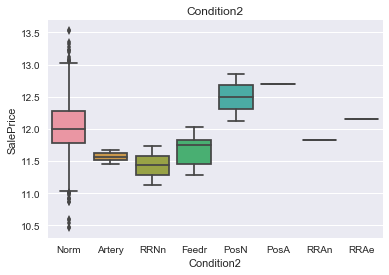

In [240]:
head = 'Condition2'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'BldgType')

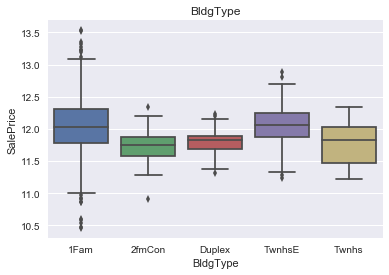

In [241]:
head = 'BldgType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'HouseStyle')

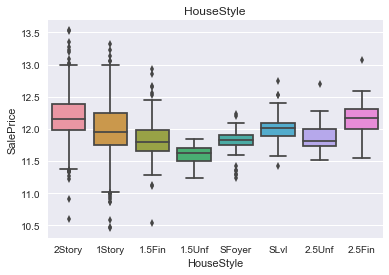

In [242]:
head = 'HouseStyle'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'OverallQual')

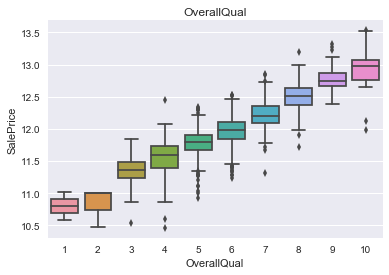

In [243]:
head = 'OverallQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'OverallCond')

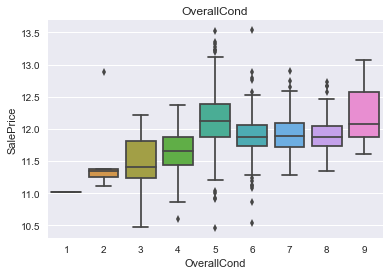

In [244]:
head = 'OverallCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'YearBuilt')

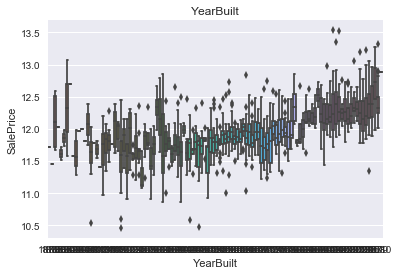

In [245]:
head = 'YearBuilt'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'YearRemodAdd')

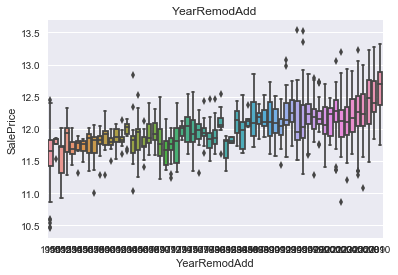

In [246]:
head = 'YearRemodAdd'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'RoofStyle')

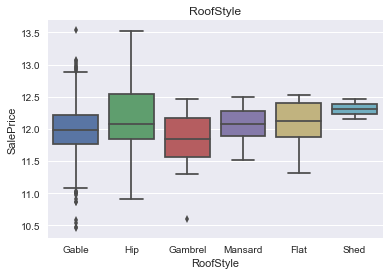

In [247]:
head = 'RoofStyle'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'RoofMatl')

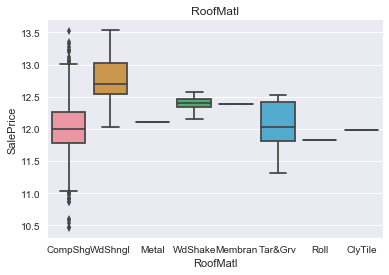

In [248]:
head = 'RoofMatl'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Exterior1st')

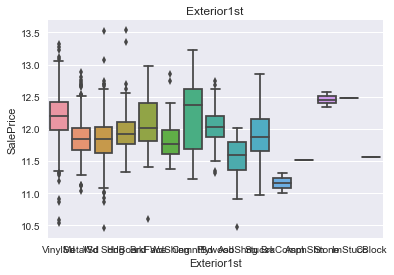

In [249]:
head = 'Exterior1st'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Exterior2nd')

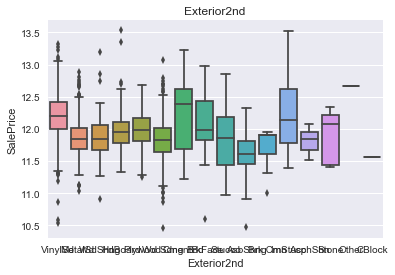

In [250]:
head = 'Exterior2nd'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.55 % Nans


Text(0.5,1,'MasVnrType')

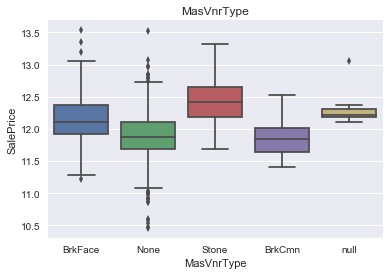

In [251]:
head = 'MasVnrType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.55 % Nans


Text(0,0.5,'SalePrice')

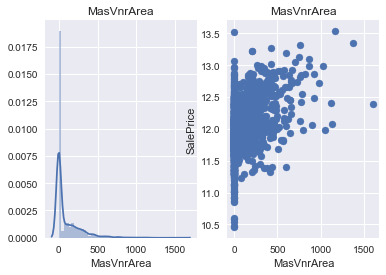

In [252]:
head = 'MasVnrArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'ExterQual')

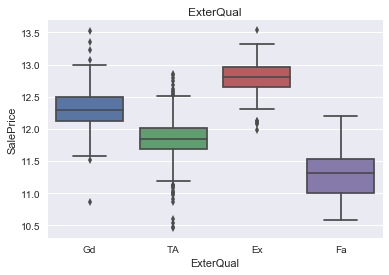

In [253]:
head = 'ExterQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'ExterCond')

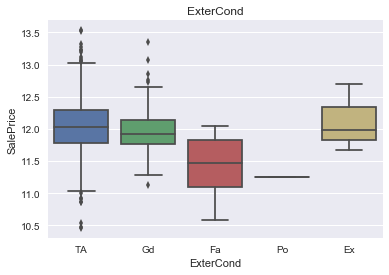

In [254]:
head = 'ExterCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Foundation')

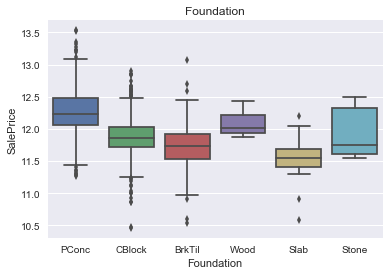

In [255]:
head = 'Foundation'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.53 % Nans


Text(0.5,1,'BsmtQual')

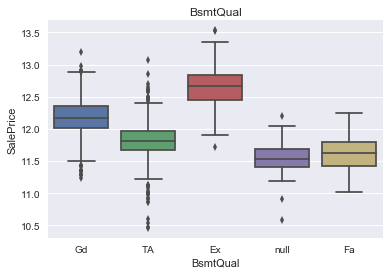

In [256]:
head = 'BsmtQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.53 % Nans


Text(0.5,1,'BsmtCond')

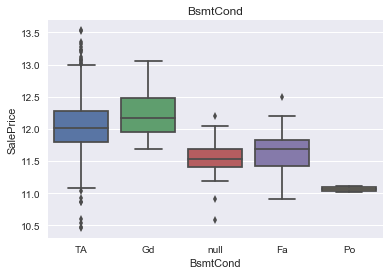

In [257]:
head = 'BsmtCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.60 % Nans


Text(0.5,1,'BsmtExposure')

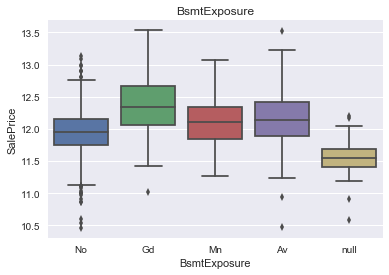

In [258]:
head = 'BsmtExposure'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.53 % Nans


Text(0.5,1,'BsmtFinType1')

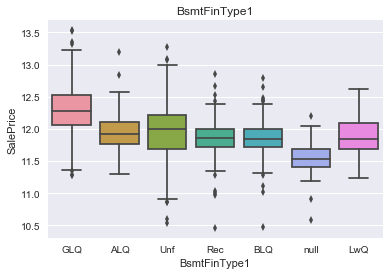

In [259]:
head = 'BsmtFinType1'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

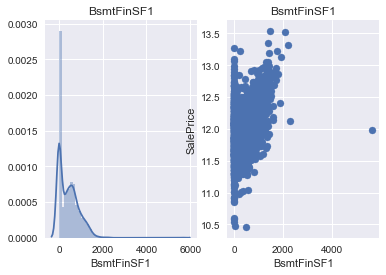

In [260]:
head = 'BsmtFinSF1'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 2.60 % Nans


Text(0.5,1,'BsmtFinType2')

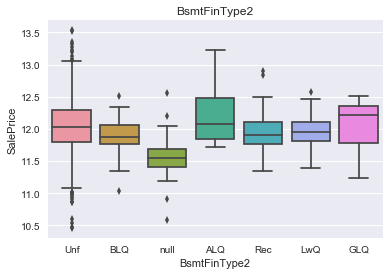

In [261]:
head = 'BsmtFinType2'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

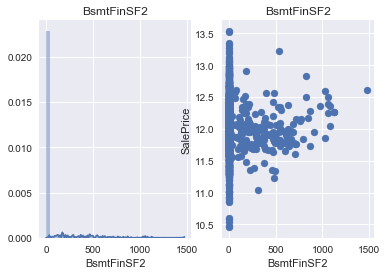

In [262]:
head = 'BsmtFinSF2'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

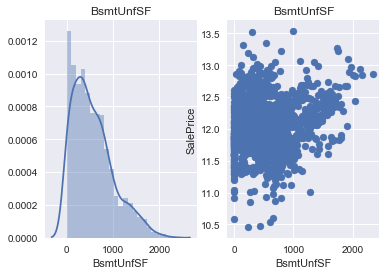

In [263]:
head = 'BsmtUnfSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

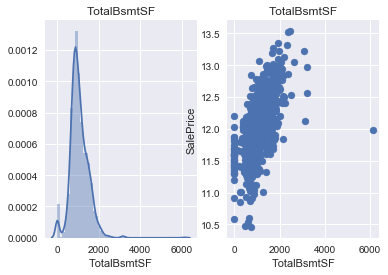

In [264]:
head = 'TotalBsmtSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'Heating')

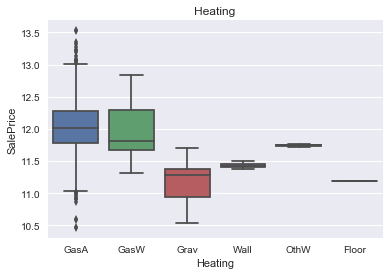

In [265]:
head = 'Heating'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'HeatingQC')

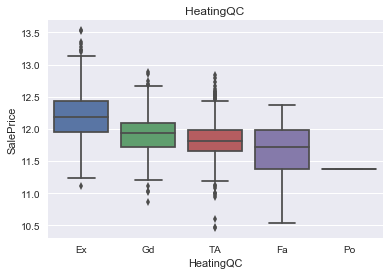

In [266]:
head = 'HeatingQC'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'CentralAir')

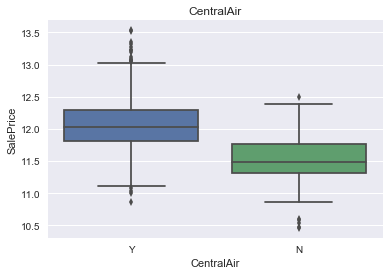

In [267]:
head = 'CentralAir'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.07 % Nans


Text(0.5,1,'Electrical')

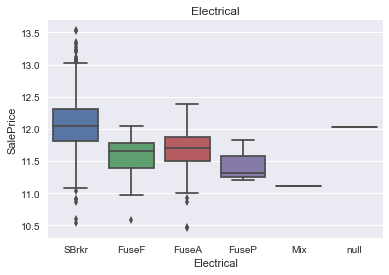

In [268]:
head = 'Electrical'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

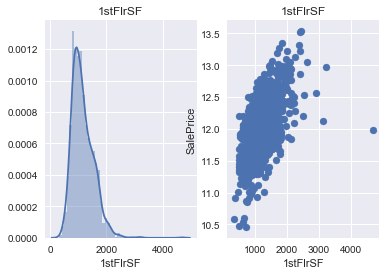

In [269]:
head = '1stFlrSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

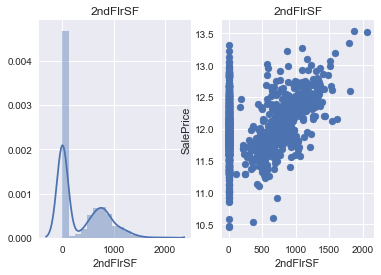

In [270]:
head = '2ndFlrSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

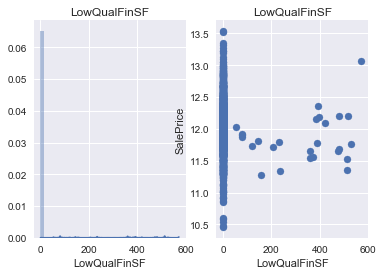

In [271]:
head = 'LowQualFinSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

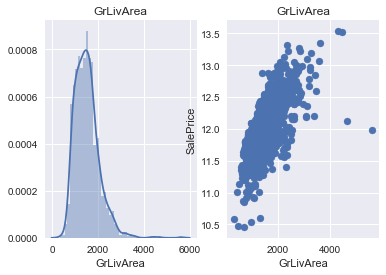

In [272]:
head = 'GrLivArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'BsmtFullBath')

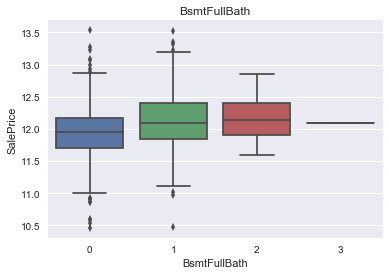

In [273]:
head = 'BsmtFullBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'BsmtHalfBath')

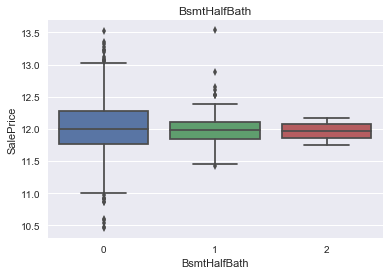

In [274]:
head = 'BsmtHalfBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'FullBath')

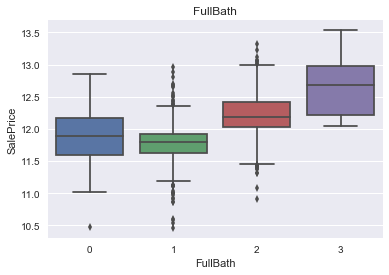

In [275]:
head = 'FullBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'HalfBath')

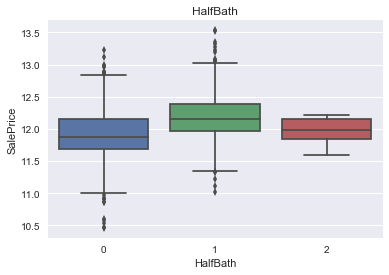

In [276]:
head = 'HalfBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'BedroomAbvGr')

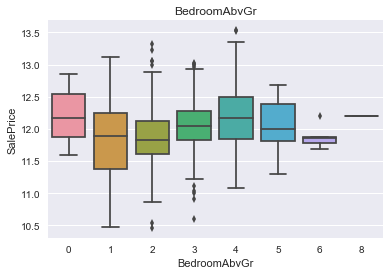

In [277]:
head = 'BedroomAbvGr'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'KitchenAbvGr')

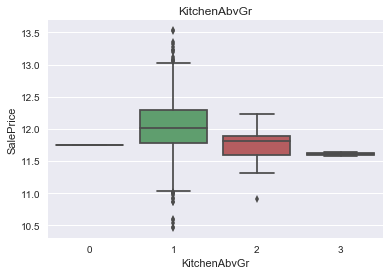

In [278]:
head = 'KitchenAbvGr'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'KitchenQual')

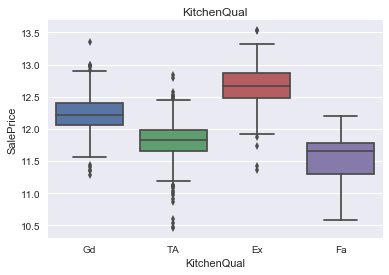

In [279]:
head = 'KitchenQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'TotRmsAbvGrd')

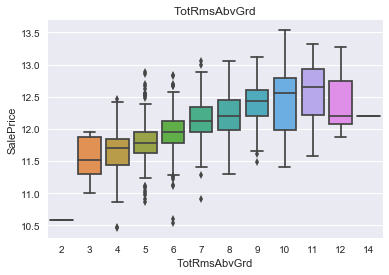

In [280]:
head = 'TotRmsAbvGrd'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Functional')

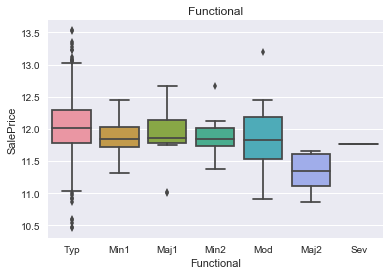

In [281]:
head = 'Functional'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Fireplaces')

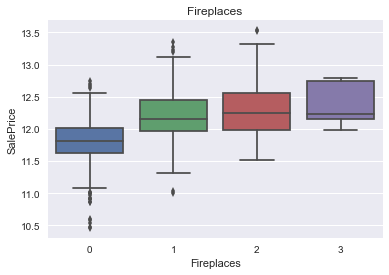

In [282]:
head = 'Fireplaces'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 47.26 % Nans


Text(0.5,1,'FireplaceQu')

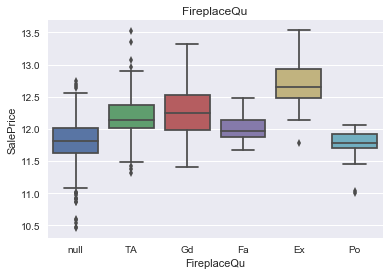

In [283]:
head = 'FireplaceQu'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 5.55 % Nans


Text(0.5,1,'GarageType')

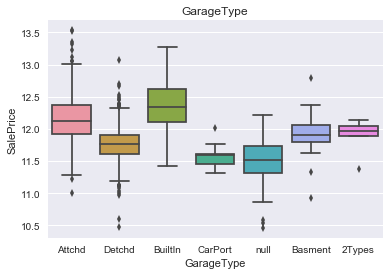

In [284]:
head = 'GarageType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 5.55 % Nans


Text(0,0.5,'SalePrice')

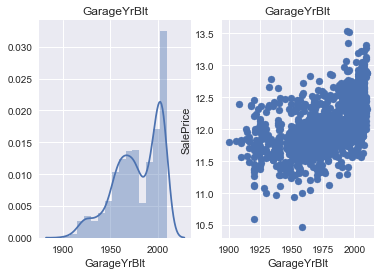

In [285]:
head = 'GarageYrBlt'

print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 5.55 % Nans


Text(0.5,1,'GarageFinish')

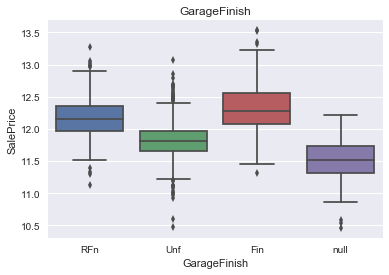

In [286]:
head = 'GarageFinish'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'GarageCars')

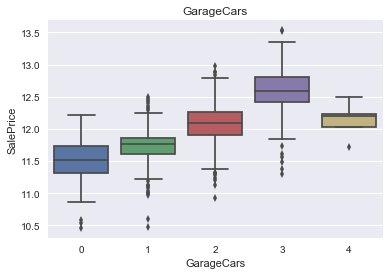

In [287]:
head = 'GarageCars'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

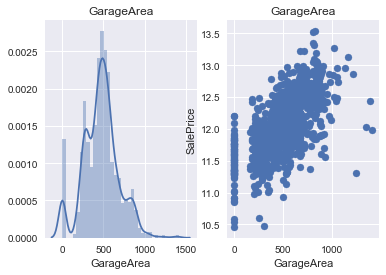

In [288]:
head = 'GarageArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 5.55 % Nans


Text(0.5,1,'GarageQual')

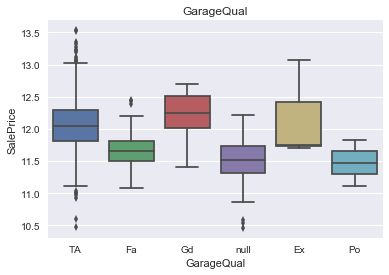

In [289]:
head = 'GarageQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 5.55 % Nans


Text(0.5,1,'GarageCond')

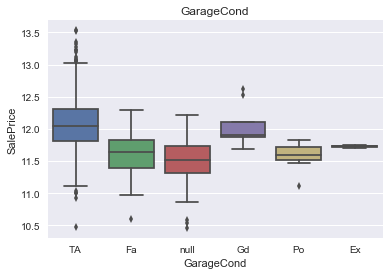

In [290]:
head = 'GarageCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'PavedDrive')

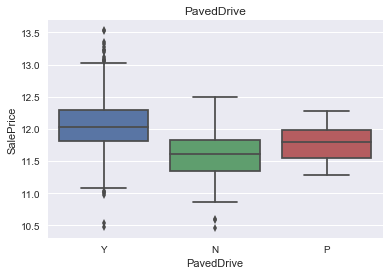

In [291]:
head = 'PavedDrive'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

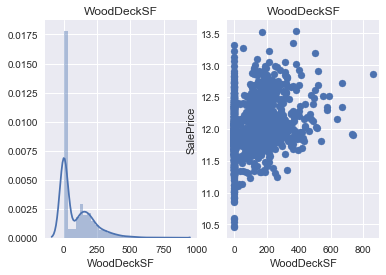

In [292]:
head = 'WoodDeckSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

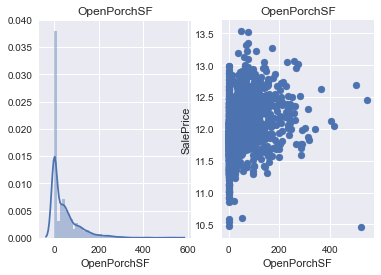

In [293]:
head = 'OpenPorchSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

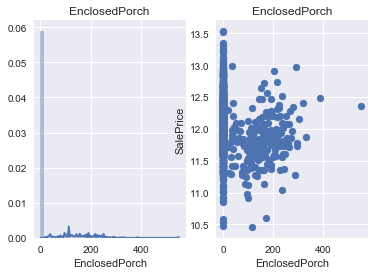

In [294]:
head = 'EnclosedPorch'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

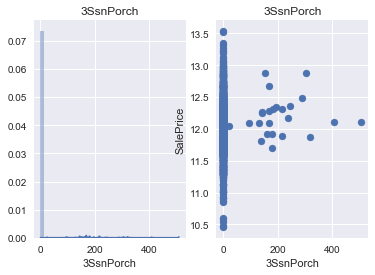

In [295]:
head = '3SsnPorch'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

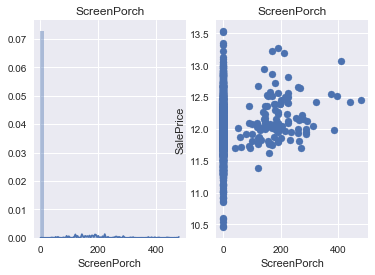

In [296]:
head = 'ScreenPorch'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

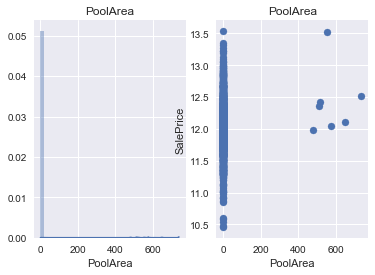

In [297]:
head = 'PoolArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 99.52 % Nans


Text(0.5,1,'PoolQC')

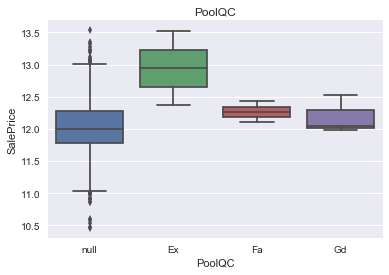

In [298]:
head = 'PoolQC'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 80.75 % Nans


Text(0.5,1,'Fence')

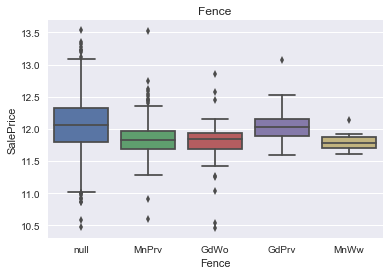

In [299]:
head = 'Fence'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)


This feature contains 96.30 % Nans


Text(0.5,1,'MiscFeature')

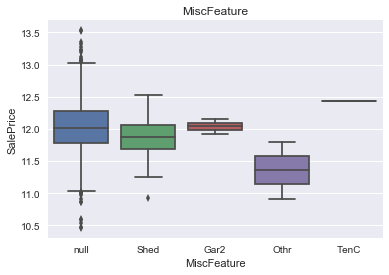

In [300]:
head = 'MiscFeature'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

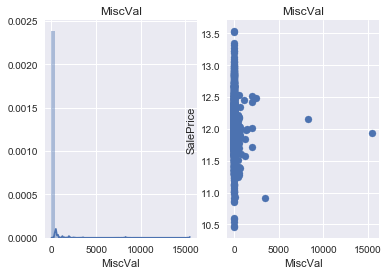

In [301]:
head = 'MiscVal'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'MoSold')

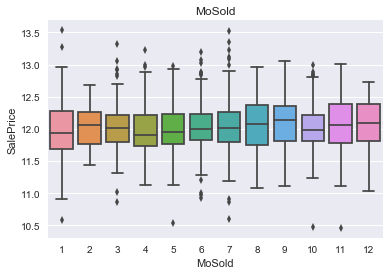

In [302]:
head = 'MoSold'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'YrSold')

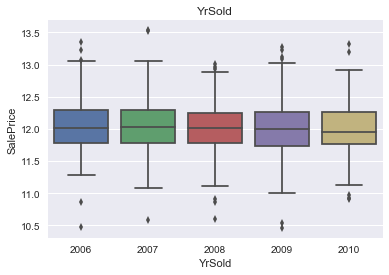

In [303]:
head = 'YrSold'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'SaleType')

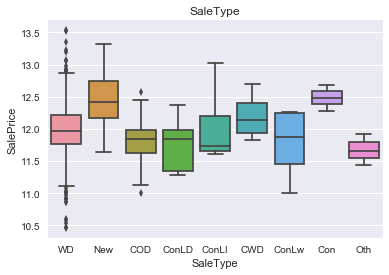

In [304]:
head = 'SaleType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'SaleCondition')

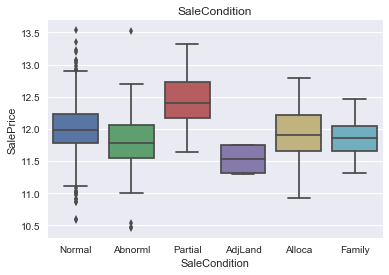

In [305]:
head = 'SaleCondition'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

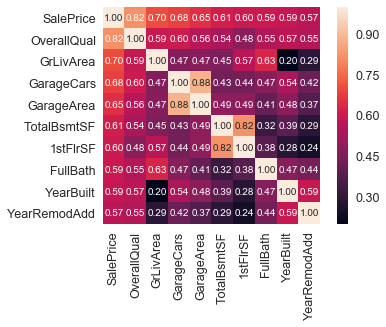

In [306]:
k  = 10 # 关系矩阵中将显示10个特征
df = pd.concat([train_df,y],axis=1)
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

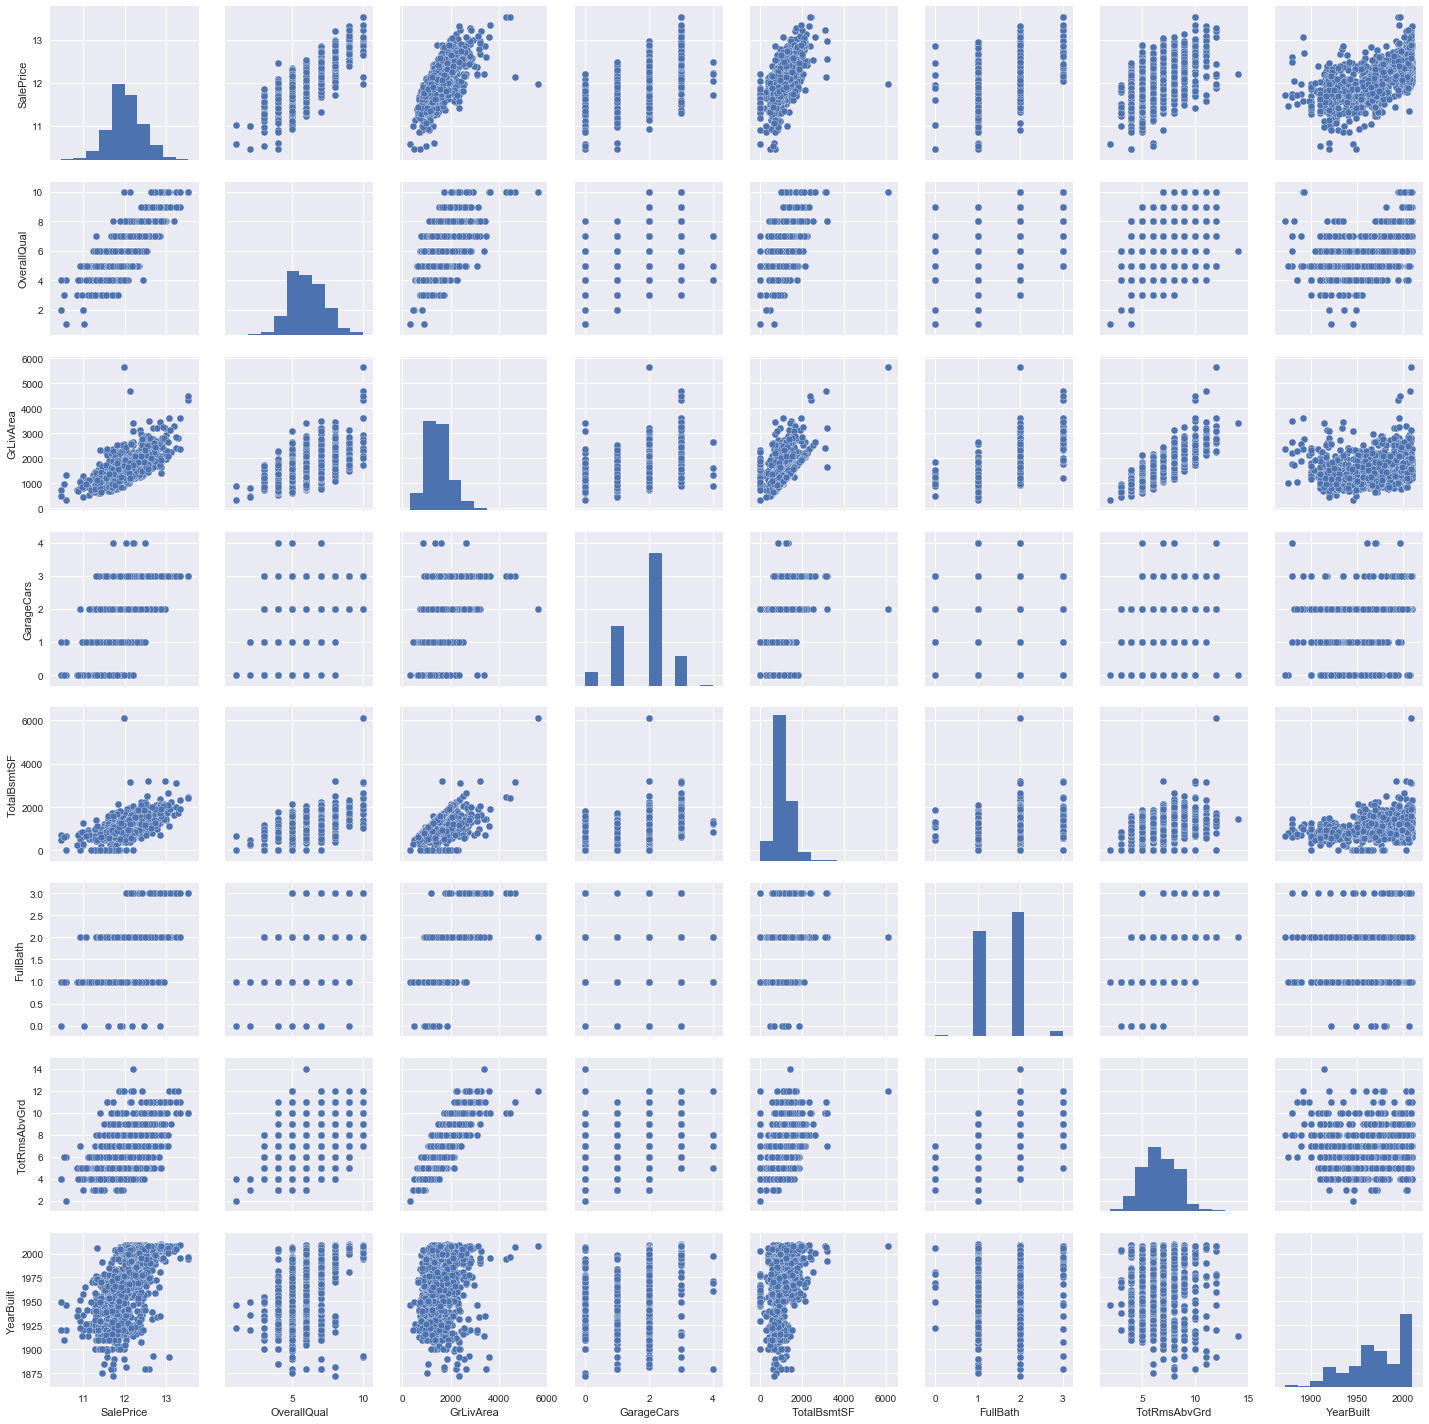

In [307]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()